## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
# What is the corresponding label in the training set?
y_train[333]

8

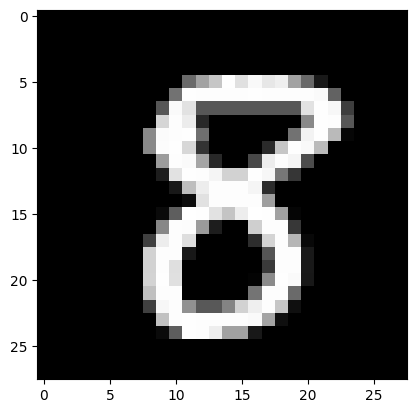

In [6]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [7]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [8]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [9]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [10]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [11]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

c:\Users\User\anaconda3\envs\dl_env_1115\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.5116 - accuracy: 0.8463 - val_loss: 0.2017 - val_accuracy: 0.9394
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.9260 - val_loss: 0.1482 - val_accuracy: 0.9553
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1971 - accuracy: 0.9409 - val_loss: 0.1206 - val_accuracy: 0.9637
Epoch 4/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1705 - accuracy: 0.9498 - val_loss: 0.1161 - val_accuracy: 0.9651
Epoch 5/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1546 - accuracy: 0.9539 - val_loss: 0.1022 - val_accuracy: 0.9690
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1454 - accuracy: 0.9570 - val_loss: 0.1000 - val_accuracy: 0.9709
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1319 - accuracy: 0.9615 - val_loss: 0.0994 - val_accuracy: 0.9715
Epoch 

In [14]:
## We will use Keras evaluate function to evaluate performance on the test set

score_1_1 = model_1.evaluate(x_test, y_test, verbose=1)
score_1_2 = model_1.evaluate(x_train, y_train, verbose=1)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0262 - accuracy: 0.9925


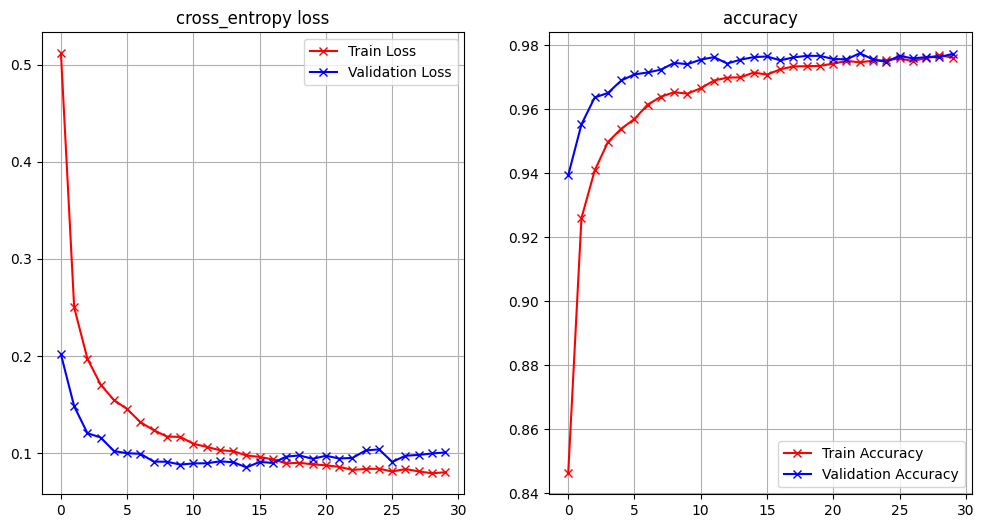

In [15]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
1. First hidden layer of size 400 and second of size 300
1. Dropout of .4 at each layer
1. How many parameters does your model have?  How does it compare with the previous model?
1. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128

In [16]:
### Build your model here
"""1 - 3."""
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

In [17]:
"""4. How many parameters does your model have? How does it compare with the previous model?"""
print("Model 1's parameters.")
model_1.summary()
print("\n- - - - - - - - - - -")
print("Model 2's parameters.")
model_2.summary()

Model 1's parameters.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________

- - - - - - - - - - -
Model 2

In [18]:
"""5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128 """
learning_rate = .001
model_2.compile(optimizer = RMSprop(lr = learning_rate),
                loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
"""cont-5. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128"""
batch_size = 128
epochs = 20
result = model_2.fit(x_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      verbose = 1,
                      validation_data = (x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3267 - accuracy: 0.9014 - val_loss: 0.1261 - val_accuracy: 0.9610
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1526 - accuracy: 0.9546 - val_loss: 0.0946 - val_accuracy: 0.9721
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1192 - accuracy: 0.9648 - val_loss: 0.0804 - val_accuracy: 0.9769
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1024 - accuracy: 0.9705 - val_loss: 0.0950 - val_accuracy: 0.9738
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0913 - accuracy: 0.9736 - val_loss: 0.0805 - val_accuracy: 0.9783
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0827 - accuracy: 0.9761 - val_loss: 0.0769 - val_accuracy: 0.9795
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9778 - val_loss: 0.0714 - val_accuracy: 0.9810
Epoch 

In [20]:
"""Accuracy"""
print("\nModel 1's accuracy")
print('Train loss: ', score_1_2[0])
print('Train accuracy: ', score_1_2[1])
print('Test loss: ', score_1_1[0])
print('Test accuracy: ', score_1_1[1])
print("\nModel 2's accuracy")
score_model_2_1 = model_2.evaluate(x_train, y_train, verbose = 1)
print('Train loss: ', score_model_2_1[0])
print('Train accuracy: ', score_model_2_1[1])
score_model_2_2 = model_2.evaluate(x_test, y_test, verbose = 1)
print('Test loss: ', score_model_2_2[0])
print('Test accuracy: ', score_model_2_2[1])


Model 1's accuracy
Train loss:  0.026215407997369766
Train accuracy:  0.9924833178520203
Test loss:  0.10076622664928436
Test accuracy:  0.977400004863739

Model 2's accuracy
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0120 - accuracy: 0.9970
Train loss:  0.011991344392299652
Train accuracy:  0.9970333576202393
313/313 [==============================] - 1s 2ms/step - loss: 0.1015 - accuracy: 0.9820
Test loss:  0.10145071148872375
Test accuracy:  0.9819999933242798


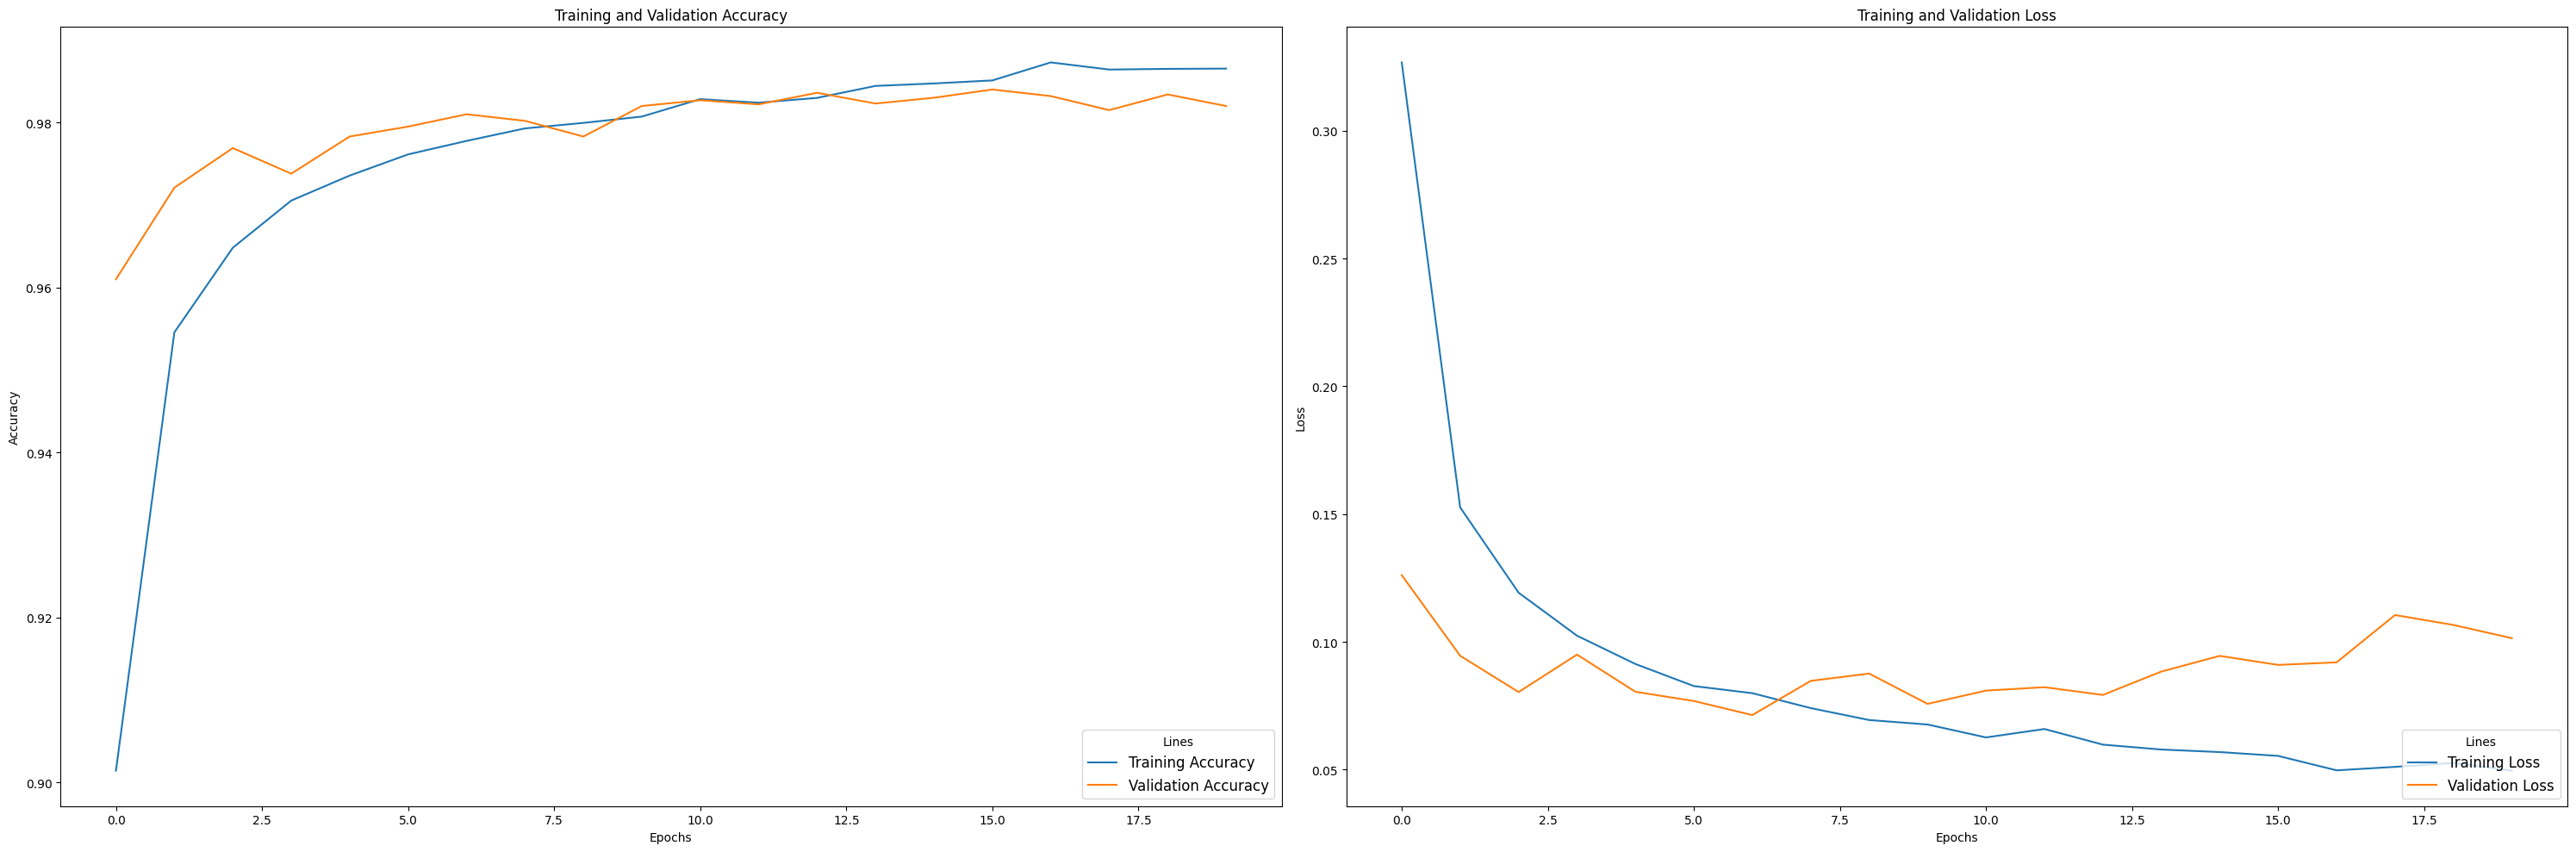

In [21]:
"""Plot Graph"""
plt.figure(figsize=(30, 10))
# สร้างกราฟ Accuracy ของ Training และ Validation
plt.subplot(1, 2, 1)
plt.plot(result.history['accuracy'], label='Training Accuracy')
plt.plot(result.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right', fontsize=12, title="Lines")
# สร้างกราฟ Loss ของ Training และ Validation
plt.subplot(1, 2, 2)
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower right', fontsize=12, title="Lines")
# แสดงกราฟ
plt.tight_layout()
plt.show()

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

Answer 1: I prefer to choose model 2 because it take less epochs than model 1 but it give a better test accuracy.

Answer 2: Trajectories of model_1 and model_2 is as the same use the same optimizer, batch size but others are different such as layer size, dropout rate and epochs. If we want to compare model we should look at hyperparameter such as I told in the first second line. And the information that we get from two model can told us, how many accuracy of each model whether train and test model. And the last question I think the loss value is more meaningful than accuracy because it can told us what model work? and the problem of parameter what we setting.

In [28]:
model_3 = Sequential()
model_3.add(Dense(400, activation='relu', input_shape=(784,)))
model_3.add(Dropout(0.4))
model_3.add(Dense(300, activation='relu'))
model_3.add(Dropout(0.4))
model_3.add(Dense(10, activation='softmax'))

learning_rate = .001
model_3.compile(optimizer = RMSprop(lr = learning_rate),
                loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

batch_size = 200
epochs = 15
result_3 = model_3.fit(x_train, y_train,
                      batch_size = batch_size,
                      epochs = epochs,
                      verbose = 1,
                      validation_data = (x_test, y_test))

Epoch 1/15
300/300 [==============================] - 2s 4ms/step - loss: 0.3537 - accuracy: 0.8923 - val_loss: 0.1470 - val_accuracy: 0.9522
Epoch 2/15
300/300 [==============================] - 1s 3ms/step - loss: 0.1612 - accuracy: 0.9521 - val_loss: 0.0995 - val_accuracy: 0.9706
Epoch 3/15
300/300 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.9646 - val_loss: 0.0791 - val_accuracy: 0.9756
Epoch 4/15
300/300 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9697 - val_loss: 0.0793 - val_accuracy: 0.9775
Epoch 5/15
300/300 [==============================] - 1s 3ms/step - loss: 0.0861 - accuracy: 0.9747 - val_loss: 0.0744 - val_accuracy: 0.9782
Epoch 6/15
300/300 [==============================] - 1s 3ms/step - loss: 0.0774 - accuracy: 0.9773 - val_loss: 0.0716 - val_accuracy: 0.9803
Epoch 7/15
300/300 [==============================] - 1s 3ms/step - loss: 0.0730 - accuracy: 0.9786 - val_loss: 0.0725 - val_accuracy: 0.9791
Epoch 

In [29]:
score_model_3_1 = model_3.evaluate(x_train, y_train, verbose = 1)
print('Train loss: ', score_model_3_1[0])
print('Train accuracy: ', score_model_3_1[1])
score_model_3_2 = model_3.evaluate(x_test, y_test, verbose = 1)
print('Test loss: ', score_model_3_2[0])
print('Test accuracy: ', score_model_3_2[1])

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127 - accuracy: 0.9963
Train loss:  0.012683064676821232
Train accuracy:  0.9963499903678894
313/313 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9827
Test loss:  0.08107750117778778
Test accuracy:  0.982699990272522


Ans 3: From above the code, I adjusted batch_size from 128 to 200 for use less calculation and epochs from 20 to 15 to use less calculation too. So the performance is excellent and use less computation too. It make increase test accuracy and test loss is decrease. 